# BIA-660 Web Mining Project
## Web Scraping  Goodreads Website
## Project Title : Recommendation System

![alt text](http://alexabloom.com/wp-content/uploads/2017/04/Goodreads-icon.png "Logo Title Text 1")

### The link for the website: [www.goodreads.com](https://www.goodreads.com/list/tag/)
### Objectives: 
Book Recommendation System for goodreads.com

Our project for BIA-660 Web Mining is going to focus on "Goodreads Books". We started this project to solve the following business problems as well as to satisfy the user needs:
* Absence of an automated category identification system for a new entrant book
* Absence of an acute recommendation module

## Scraping the tags (Categories) & Links
Initally, we are scraping the 29 tags (categories of the books) and their links to go inside each category and browse for the books which belong to that category.
* Using BeautifulSoup to scrape the data from the Goodreads website. 
* Using "Request" library to retrive the source code.
* Initializing a function called "getCategoryHref" to get the Cetegory links.
* Writing the contents to the "categoryListGR.csv" File.

[categoryListGR.csv](https://github.com/MukunthR/recomendation-system/blob/master/categoryListGR.csv)

In [ ]:
import requests
import csv
import pandas as pd

# import BeautifulSoup from package bs4 (i.e. beautifulsoup4)
from bs4 import BeautifulSoup

headers = { 'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.'
                          '86 Safari/537.36'}

page = requests.get('https://www.goodreads.com/list/tag/', headers = headers)

# send a get request to the web page
siteUrl = "https://www.goodreads.com"
category = {}

def getCategoryHref(url):
    page = requests.get(url, headers = headers)
    if page.status_code == 200:
        # initiate a beautifulsoup object using the html source and Python’s html.parser
        soup = BeautifulSoup(page.content, 'html.parser')
        hrefTag = soup.select('div#topRow > div.cell a.listTitle')
        for href in hrefTag:
            finalHref = siteUrl + href['href']
            break
        return finalHref    

if page.status_code == 200:
    soup = BeautifulSoup(page.content, 'html.parser')
#     print(soup.prettify())
    categoryNameTags = soup.select('div ul.listTagsTwoColumn li a.actionLinkLite')
    for name in categoryNameTags:
        print(name)
        categoryHref = getCategoryHref(siteUrl + name['href'])
        category[name.text.strip()] = categoryHref
    
    with open('categoryListGR.csv', 'w') as file:
        wrt = csv.writer(file, delimiter=',', lineterminator='\n')
        wrt.writerow(['Category', 'Link'])
        for key,value in category.items():
            wrt.writerow([key,value])

## Fetching books from each category with their Scores and Links
Each category from the previous step is called for and the data for the first 300 books are scrapped. This dataset includes Category, Names, Links and Scores attributes.
* Creating a List each attribute and combining them to form Pandas Dataframe.
* Using categoryListGR.csv file to fetch the data of the inidividual book. 
* Writing the contents to the "categoryBookFile.csv" File.

 [categoryBookFile.csv](https://github.com/MukunthR/recomendation-system/blob/master/categoryBookFile.csv)

In [ ]:
import requests
import csv
import pandas as pd

# import BeautifulSoup from package bs4 (i.e. beautifulsoup4)
from bs4 import BeautifulSoup

headers = { 'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.'
                          '86 Safari/537.36'}
BookName = []
bookLink = []
Page_No = []
bookTupList = []
Score = []
pairWiseScore = []
flagList = []
flagCount = 0
catCustom = []

siteUrl = "https://www.goodreads.com"
def pairwise(it):
    it = iter(it)
    while True:
        yield next(it), next(it)
        
def scrapeData(category, url):
    print(category)
    page = requests.get(url, headers = headers)
    if page.status_code == 200:
        
        print("page success")
        soup = BeautifulSoup(page.content, 'html.parser')
        bookName = soup.select('a.bookTitle span')
        for i in bookName:
            BookName.append(i.text)
            catCustom.append(category)
        link = soup.select('a.bookTitle')
        for i in link:
            bookLink.append(siteUrl + i['href'])
        scr = soup.select('div span.smallText > a')
        for i in scr:
            Score.append(i.text.strip())
        for a,b in pairwise(Score):
            pairWiseScore.append(a + b)
        flagList = list(zip(catCustom,BookName,bookLink,pairWiseScore))
        if (len(flagList) % 300) != 0:
            print(len(flagList))
            Page = soup.select('div.pagination a.next_page')
            if Page:
                for i in Page:
                    scrapeData(category, siteUrl + i["href"])
        return list(zip(catCustom,BookName,bookLink,pairWiseScore))
          

def scrapteCategoryData(categoryList):
    for category,categoryHref in categoryList.items():
        print(category,categoryHref)
        scrapeData(category, categoryHref)
        
    entireList = list(zip(catCustom,BookName,bookLink,pairWiseScore))
    for element in entireList:
        print(element)
    final_data = pd.DataFrame(entireList, columns = ['Category','Name','Link','Scores'])
    print(final_data)
    final_data.to_csv('categoryBookFile.csv', index = False)
    
    print("Total length is :: " + str(len(entireList)))


if __name__ == "__main__": 
    data = pd.read_csv("categoryListGR.csv", header=0)
    categoryList = dict(zip(data["Category"].values.tolist(), data["Link"].values.tolist()))
    scrapteCategoryData(categoryList)

## Getting the contents of the books
The content of all the 300 books of each category is taken and stored in a csv file.
*  Reading the entire csv file, fetch the book links columns and convert it into list.
* Iterate each book links from the list and fetch book contents such as Name, Author Name, Author profile link, Ratings, Awards, Descriptions and which other category it belongs to.

[entireBookList1000.csv](https://github.com/MukunthR/recomendation-system/blob/master/entireBookList1000.csv)

[entireBookList8700.csv](https://github.com/MukunthR/recomendation-system/blob/master/entireBookList8700.csv)

In [ ]:
import requests
import csv
import pandas as pd
from bs4 import BeautifulSoup

headers = { 'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.'
                          '86 Safari/537.36'}

entireBookList = []

def scrapeData(link, category, score):
    OtherCategories = []
    page = requests.get(link, headers = headers)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, 'html.parser')
        
        bookTag = soup.select('div h1#bookTitle')
        if not bookTag:
            bookName = "N/A"
        else:
            for tag in bookTag:
                bookName = tag.text.strip()
        
        authorTag = soup.select('div a.authorName')
        if not authorTag:
            authorName = "N/A"
        else:
            for author in authorTag:
                authorName = author.text.strip()
        
        authorLinkTag = soup.select('div a.authorName')
        if not authorLinkTag:
            authorLink = "N/A"
        else:
            for i in authorLinkTag:
                authorLink = i["href"]
        
        ratingTag = soup.select('span.average')
        if not ratingTag:
            rating = "N/A"
        else:
            for i in ratingTag:
                rating = i.text
        
        awardsTag = soup.select('div.infoBoxRowItem a.award')
        if not awardsTag:
            awards = 'N/A'
        else:
            for i in awardsTag:
                awards = i.text.strip()
        
        othrcat = soup.select('div.elementList a.actionLinkLite')
        if not othrcat:
            othrCat = "N/A"
        else:
            for i in othrcat:
                OtherCategories.append(i.text.strip())
            othrCat = " ".join(OtherCategories)
        
        
        descriptionTag = soup.select('div#description span')
        if not descriptionTag:
            description = "N/A"
        else:
            for i in descriptionTag:
                description = i.text
        
        
        bookTuple = (category, bookName, authorName, authorLink, rating, awards, othrCat, description,score)
        entireBookList.append(bookTuple)
        

if __name__ == "__main__":
    data = pd.read_csv("categoryBookFile.csv", header=0)
    bookLinkList = data["Link"].tolist()
    bookCategories = data["Category"].tolist()
    bookScores = data["Scores"].tolist()
    j = 0
    for link, category, score in zip(bookLinkList, bookCategories, bookScores):
        j += 1
        print(j)
        print(link, category, score)
        scrapeData(link, category, score)
        
    for element in entireBookList:
        print(element)
        
    final_data = pd.DataFrame(entireBookList, columns = ['Category','Book Name','Author Name','Author Link','Ratings', 'Awards', 'OtherLinks', 'Description', 'Score'])
    final_data.to_csv('entireBookList8700.csv', index = False)

# Getting reviews and other details for all unique books
The reviews of all 4680 unique books is taken and stored in a csv file. (Click [here](https://github.com/MukunthR/recomendation-system/blob/master/categoryBookFileWODuplicates.csv) to access the file)
*  Reading the entire csv file, fetch the **book name** and **links** columns and convert it into list.
* Iterating each book links from the list and fetch book contents such as ReviewerName,ReviewerProfileLink, ReviewLikes, ReviewStars, ReviewDate and ReviewContent for each book.

Writing all review details to allReviews.csv
[allReviews.csv](https://drive.google.com/open?id=1HgJK3lVb2P9GX2EVkn9KyV-Kl2ZTPl-2)

In [ ]:
import requests
import csv
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re




reviewText = []
reviewBy = []
reviewLikes = []
reviewerProfileLink = []
reviewDate = []
reviewStars = []
reviewLinks = []
bookname = []



siteUrl = "https://www.goodreads.com"

def scrapeData(link,name):
    page = requests.get(link)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, 'html.parser')
        
        
        reviewCountOnPage=soup.select("div.bookReviewsPaginationCount span")
        reviewCountOnPage = reviewCountOnPage[0].get_text()
        reviewCountOnPage = reviewCountOnPage.split("-")[1]
        print(reviewCountOnPage)

        
        for j in soup.select("a.left.imgcol"):
            reviewBy.append(j.get("title"))
            reviewerProfileLink.append(siteUrl+j.get("href"))
            
            
        #get review date#
        for j in soup.select("a.reviewDate.createdAt.right"):
            reviewDate.append(j.get_text())    

            #get review stars#
        for j in soup.select("span.staticStars"):
            reviewStars.append(j.get_text())

            #get likes for each review#
        for j in soup.select("div.updateActionLinks span.likeItContainer a span.likesCount"):
            reviewLikes.append(j.get_text().split(" ")[0])
            
            
        print(name)
   
        for data in soup.findAll('div', {'class': 'updateActionLinks'}):
            links = data.findAll('a', {'href': True}, text='see review')
            for j in links:
                rlinks = siteUrl+j.get("href")
                print(rlinks)
                url = rlinks
                html = urlopen(url)
                soup2 = BeautifulSoup(html, "html.parser")
                for data2 in soup2.findAll('div', {'class': 'reviewText mediumText description readable'}):
                    print(type(data2))
                    reviewContent = data2.text
                    print(type(reviewContent))
                    reviewContent = reviewContent.replace("\n", " ")
                    reviewContent = re.sub(r"\s+", ' ', reviewContent)
                    bookname.append(name)

                    reviewText.append(reviewContent)
                reviewLinks.append(rlinks)
        allReviews = list(zip(bookname,reviewBy,reviewerProfileLink,reviewDate,reviewStars,reviewLikes,reviewText,reviewLinks))
        
#         print(allReviews)
        return allReviews


if __name__ == "__main__":
    data = pd.read_csv("categoryBookFileWODuplicates.csv", header=0)
    LinkList = data["Link"].tolist()
    BookName = data["Name"].tolist()
    j = 0
    for link,name in zip(LinkList,BookName):
        j += 1
        print(j)
        print(link)
        allReviews = scrapeData(link,name)
        
    final_data = pd.DataFrame(allReviews, columns = ['Name','reviewBy','reviewerProfileLink','reviewDate','reviewStars','reviewLikes','reviewText','reviewLinks'])
    
    final_data.to_csv('allReviews.csv', index = False)

# Scrap emotions from powerthesaurus.org

* Using beautifulSoup scraped words linked to anger, joy, sadness, love, surprise, fear
* For each emotions scraped a list of 500 unique words linked to each emotion

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

headers = { 'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.'
                          '86 Safari/537.36'}

homeLink = 'https://www.powerthesaurus.org'
emotionDict = {}
wordList = []
def getReviews(link,emotion):
    page = requests.get(link, headers=headers)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, 'html.parser')
        synonyms = soup.select('.pt-thesaurus-card__term-title a')
        # print(synonyms)
        nextPage = soup.select('.pt-pagination a.pt-pagination__button')
        print(nextPage)
        for synonym in synonyms:
            print(synonym.text.strip())
            wordList.append(synonym.text.strip())
        for next in nextPage:
            if(next['title'] == 'next page'):
                # print(homeLink + next['href'])
                print(homeLink + next['href'])
                getReviews(homeLink + next['href'], emotion)

        emotionDict[emotion] = wordList
        with open('dict.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in emotionDict.items():
                writer.writerow([key, value])
        # wordList[:] = []
        print(emotionDict)




if _name_ == "_main_":
    getReviews('https://www.powerthesaurus.org/anger/synonyms/', 'anger')
    getReviews('https://www.powerthesaurus.org/joy/synonyms/', 'joy')
    getReviews('https://www.powerthesaurus.org/sadness/synonyms/', 'sadness')
    getReviews('https://www.powerthesaurus.org/love/synonyms/', 'love')
    getReviews('https://www.powerthesaurus.org/surprise/synonyms/', 'surprise')
    getReviews('https://www.powerthesaurus.org/fear/synonyms/', 'fear')

### List of the libraries required to import

In [2]:
# Importing the libraries

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import nltk, re, string
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
import numpy as np  
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import numpy as np
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from scipy.spatial import distance
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import classification_report

C:\Users\murak\Anaconda3a\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Steps for data pre-processing
Initially, we scraped 300 books from 29 cateogries
* Merged similar categories together, for e.g. merged category 'teen' and 'children' together
* Removed low performing categories 

In [3]:
#Data pre-processing

# Import the dataset
data=pd.read_csv("entireBookList8700.csv",header=0)


# Changing the name of the category ya to Young adult - handling the duplication of the categories 
data['Category'].replace('ya', 'young-adult',inplace=True)
data['Category'].replace('teen', 'children',inplace=True)
data['Category'].replace('non-fiction','nonfiction',inplace=True)
print(data['Category'].unique())


# Improve performance by removing low performing categories
data = data[data.Category != 'contemporary']
data = data[data.Category != 'thriller']
data = data[data.Category != 'middle-grade']
data = data[data.Category != 'covers']
data = data[data.Category != 'fiction']
data = data[data.Category != 'best']


# Renaming column name relevant to data in the column
df = data.rename(columns={'OtherLinks': 'Other Categories'})
# print(df['Other Categories'][0])


# Using the re function to edit other category column based on our pattern
token = []
for  text in df['Other Categories']:
    pattern = r'[A-Z]\w+'
    tokens = nltk.regexp_tokenize(str(text), pattern)
    token.append(tokens)
# print(len(token))


# Overwriting the Other Categories with the modified tokens as per the requirements
df['Other Categories'] = token
# print(df['Other Categories'][0])


# Joining the words in 'Other Categories' from a list to line
df['Other Categories'] = df['Other Categories'].apply(lambda x: ' '.join(x))
# print(df['Other Categories'][0])


# Converting the entire dataframe to lower case
data = df.apply(lambda x: x.astype(str).str.lower())
# print(data['Other Categories'])


#finding the count of the categories
print(data['Category'].value_counts())

# Removing null values
data.dropna(axis='columns')
# print(data.head())
# print(len(data))

# Removing duplicate books
data = data.drop_duplicates(subset = 'Book Name')
# data.head()
# print(len(data))

data['Training Text'] = data['Description'].astype(str)  + ' ' + (8*data['Other Categories']) + ' ' + data['Author Name'] 
# print(data['Training Text'][0])

['romance' 'fiction' 'young-adult' 'fantasy' 'children' 'science-fiction'
 'covers' 'best' 'nonfiction' 'history' 'mystery' 'historical-fiction'
 'horror' 'paranormal' 'love' 'sci-fi' 'historical-romance' 'gay' 'series'
 'thriller' 'biography' 'middle-grade' 'graphic-novels' 'contemporary'
 'women' 'classics']
children              600
young-adult           600
nonfiction            600
horror                300
biography             300
graphic-novels        300
history               300
gay                   300
romance               300
mystery               300
historical-romance    300
sci-fi                300
love                  300
series                300
classics              300
historical-fiction    300
paranormal            300
women                 300
science-fiction       300
fantasy               300
Name: Category, dtype: int64


# Plot for number of books in each category
Cateogry name on x-axis and Number of books on y-axis

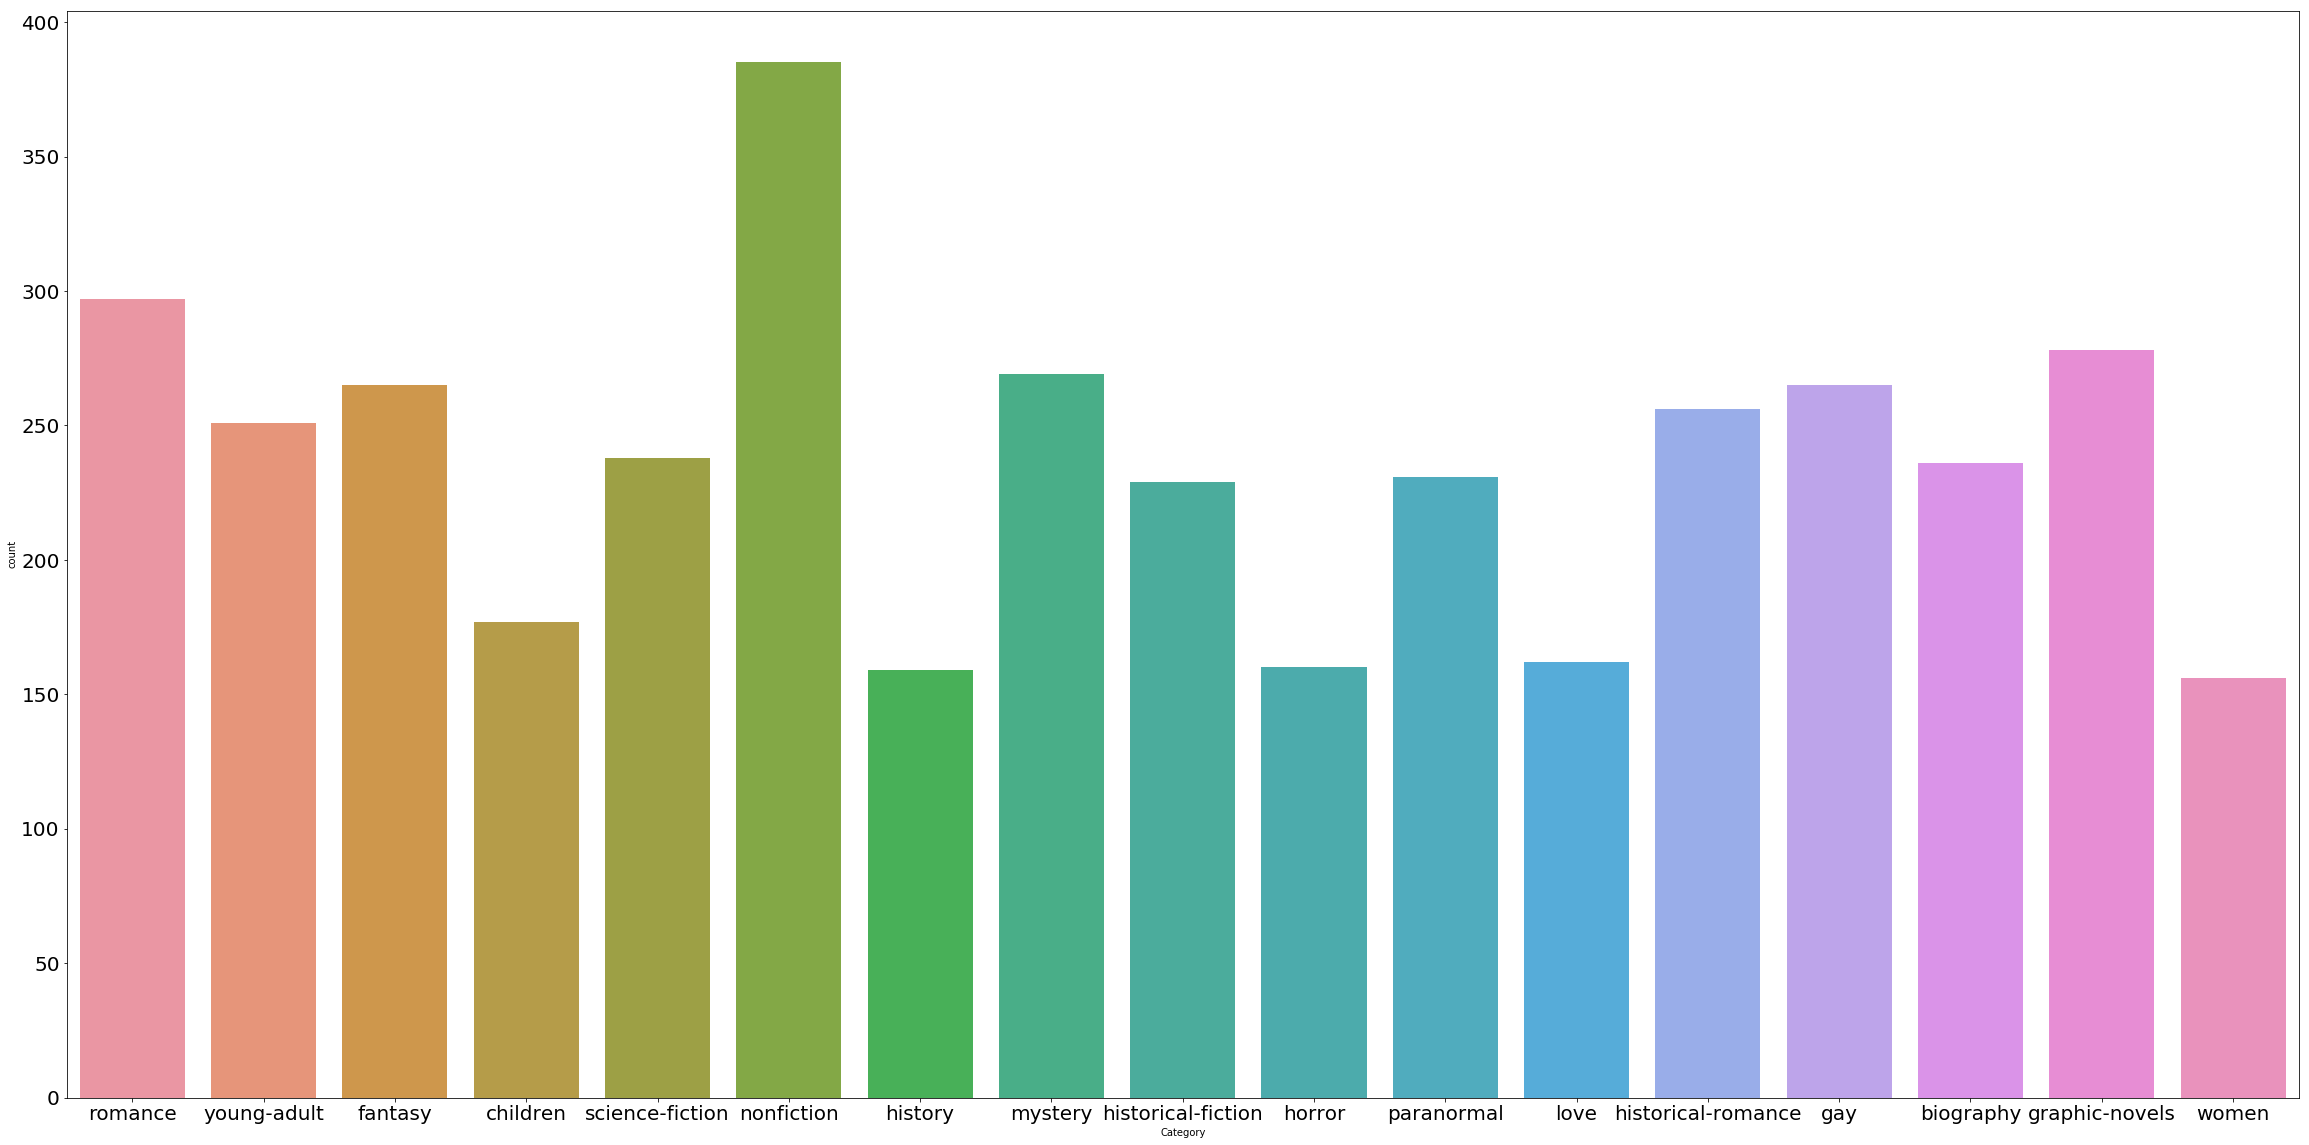

In [5]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
sns.countplot(data=data, x='Category')

# Categorizing using One vs One Classifier

We performed multi-label classsification using One vs One Linear SVC.
* Split dataset into training (90%) and test (10%)
* Trained K (K − 1) / 2 classifiers for a K-way multiclass problem (K=17)
* Got samples of binary classes for training dataset
* Applied voting scheme i.e. applied K(K-1)/2 classifiers to test dataset
* Each class got a vote "+1" and the class with highest "1"s gets predicted 

**Got a precision of <font color=red>77%</font> and accuracy of <font color=red>75%</font>**

In [7]:
# Categorizing the books based on their Genre

metrics = ['precision_macro', 'recall_macro', "f1_macro"]

# Initialize the TfidfVectorizer with stop words removed
tfidf_vect = TfidfVectorizer(stop_words="english") 

# Generate tfidf matrix
dtm= tfidf_vect.fit_transform(data['Training Text'])

print("type of dtm:", type(dtm))
print("size of tfidf matrix:", dtm.shape)
# print(dtm[0:10])

# split dataset into train (90%) and test sets (10%)
X_train, X_test, y_train, y_test = train_test_split(\
                dtm, data["Category"], test_size=0.1, random_state=300) # 400 #300

    
clf = OneVsOneClassifier(LinearSVC())
classifier = clf.fit(X_train, y_train)


classifier.estimators_
classifier.classes_

print(classifier.score(X_test,y_test))

# Get Performance report  
predicted = classifier.predict(X_test)
print(predicted.shape)
print(predicted[0:2])
print(y_test[0:2])

print(classification_report\
      (y_test, predicted))

# Implementing Cross validation
cv = cross_validate(clf, dtm, data["Category"], \
                    scoring=metrics, cv=6)

print("Test data set average precision:")
print(cv['test_precision_macro'])
print("\nTest data set average recall:")
print(cv['test_recall_macro'])
print("\nTest data set average fscore:")
print(cv['test_f1_macro'])

type of dtm: <class 'scipy.sparse.csr.csr_matrix'>
size of tfidf matrix: (4014, 35923)
0.753731343283582
(402,)
['nonfiction' 'paranormal']
6620     biography
4195    paranormal
Name: Category, dtype: object
                    precision    recall  f1-score   support

         biography       0.86      0.89      0.88        28
          children       0.75      0.56      0.64        16
           fantasy       0.86      0.69      0.76        35
               gay       0.86      0.78      0.82        23
    graphic-novels       0.90      1.00      0.95        27
historical-fiction       0.77      0.90      0.83        30
historical-romance       0.93      0.96      0.94        26
           history       0.81      0.68      0.74        25
            horror       0.60      0.35      0.44        17
              love       1.00      0.56      0.72        16
           mystery       0.89      0.86      0.87        28
        nonfiction       0.52      0.70      0.60        33
        par

### Confusion matrix for One Vs One Classifer 

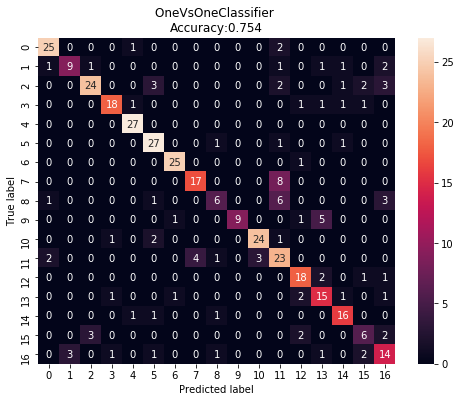

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
# Creates a confusion matrix
cm = confusion_matrix(y_test, predicted) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('OneVsOneClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Linear plot of recall, precision and f-score for One vs One Classifier

0.7567773793331602
0.7282105426872356
0.7332314861337826


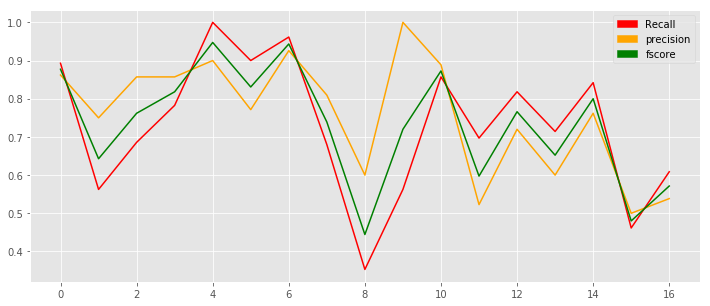

In [11]:

precision, recall, fscore, support= precision_recall_fscore_support(y_test,predicted)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

precisionSeries = pd.Series(precision)
recallSeries = pd.Series(recall)
fscoreSeries =pd.Series(fscore)
print(precisionSeries.mean())
print(recallSeries.mean())
print(fscoreSeries.mean())
plt.figure(figsize=(12,5))
plt.plot(precision, color='orange')
plt.plot(recall, color='red')
plt.plot(fscore, color='green')
red_patch = mpatches.Patch(color='red', label='Recall')
orange_patch = mpatches.Patch(color='orange', label='precision')
blue_patch = mpatches.Patch(color='green', label='fscore')
plt.legend(handles=[red_patch,orange_patch,blue_patch])
plt.show()

# Categorizing using SVM Linear SVC 

We tried to categorize the books using a single label classification model

* Split the dataset into train and test dataset
* Fine tuned the hyperparameters using GridSearchCV
* Calculated the precision, recall and f1-score for the model


In [12]:
# Categorizing the books based on their Genre

# split dataset into train (90%) and test sets (10%)
X_train, X_test, y_train, y_test = train_test_split(\
                data['Training Text'], data["Category"], test_size=0.1, random_state=300)

tfidf_vect = TfidfVectorizer() 
clf = svm.LinearSVC()
metric = "f1_macro"

clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', svm.LinearSVC())   #MultinomialNB()    #svm.LinearSVC()
                   ])

parameters = {'tfidf__min_df' : [1,2,5] ,
              'tfidf__stop_words' : [None,"english"] ,
              'clf__C': [0.5,1.0,5.0],
}

gs_clf = GridSearchCV(clf, param_grid=parameters, scoring=metric, cv=6)


gs_clf = gs_clf.fit(X_train, y_train)

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])

print("best f1 score:", gs_clf.best_score_)


y_pred = gs_clf.predict(X_test)

# get the list of unique labels
labels=sorted(y_train.unique())

# calculate performance metrics. 
precision, recall, fscore, support= precision_recall_fscore_support(y_test,y_pred,labels=labels)

from sklearn.metrics import confusion_matrix

print("labels: ", labels)
print("precision: ", precision)
print("recall: ", recall)
print("f-score: ", fscore)
print("support: ", support)

clf__C :  1.0
tfidf__min_df :  1
tfidf__stop_words :  None
best f1 score: 0.7024809231080532
labels:  ['biography', 'children', 'fantasy', 'gay', 'graphic-novels', 'historical-fiction', 'historical-romance', 'history', 'horror', 'love', 'mystery', 'nonfiction', 'paranormal', 'romance', 'science-fiction', 'women', 'young-adult']
precision:  [0.82758621 0.75       0.89655172 0.8        0.9        0.71428571
 0.86666667 0.79166667 0.6        0.9        0.82142857 0.58333333
 0.8        0.58333333 0.76190476 0.58333333 0.45454545]
recall:  [0.85714286 0.5625     0.74285714 0.86956522 1.         0.83333333
 1.         0.76       0.52941176 0.5625     0.82142857 0.63636364
 0.72727273 0.66666667 0.84210526 0.53846154 0.43478261]
f-score:  [0.84210526 0.64285714 0.8125     0.83333333 0.94736842 0.76923077
 0.92857143 0.7755102  0.5625     0.69230769 0.82142857 0.60869565
 0.76190476 0.62222222 0.8        0.56       0.44444444]
support:  [28 16 35 23 27 30 26 25 17 16 28 33 22 21 19 13 23]


### Confusion matrix for SVM Linear SVC

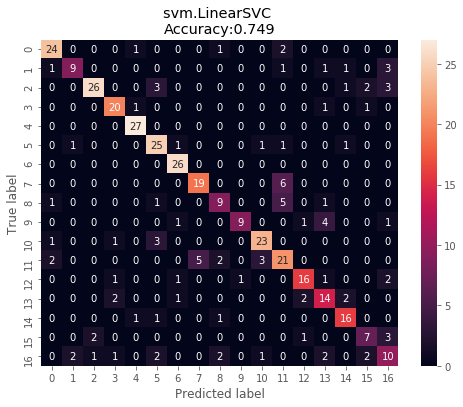

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('svm.LinearSVC \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Linear plot of recall, precision and f-score for SVM Linear SVC

0.7432138686195482
0.7284936074986591
0.7308811709862612


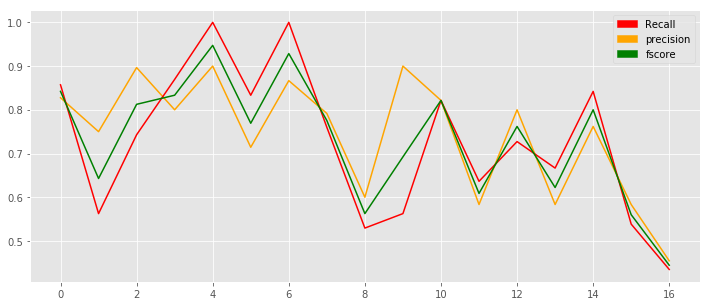

In [14]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

precisionSeries = pd.Series(precision)
recallSeries = pd.Series(recall)
fscoreSeries =pd.Series(fscore)
print(precisionSeries.mean())
print(recallSeries.mean())
print(fscoreSeries.mean())
plt.figure(figsize=(12,5))
plt.plot(precision, color='orange')
plt.plot(recall, color='red')
plt.plot(fscore, color='green')
red_patch = mpatches.Patch(color='red', label='Recall')
orange_patch = mpatches.Patch(color='orange', label='precision')
blue_patch = mpatches.Patch(color='green', label='fscore')
plt.legend(handles=[red_patch,orange_patch,blue_patch])
plt.show()

# Sentiment Analysis

Used TextBlob and Vader library to compute the emotion of each book based on the reviews given by the readers.

* Normalized the dataset of reviews since the number of reviews is high
* Used emotion dataset scraped from powerthesaurus.org to get a dictionary of unique words for 6 emotions (love, joy, fear, anger, surprise, sadness 
* Derived the overall polarity of each review 
> Got positive, negative, neutral and compound score for each review
* Derived the subjectivity of each review
* Derived emotion for each book using cosine similarity between reviews and emotions from powerthesaurus.org

In [15]:
# Sentimental Analysis - Emotions, Positive, Negative, Compound, Neutral, Polarity & Subjectivity


import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
sid = SentimentIntensityAnalyzer()
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import csv
Emotions = pd.read_csv("Emotions.csv",header=None, encoding="ISO-8859-1")
stop_words = stopwords.words('english')

# Importing the dataset & Joining them together

def manipulateData(bookName, bookDataFrame):
    print("Book Name : " + bookName)
    print("Book Review text")
    sentenceAnalysis = []
    bookReviewList = bookDataFrame['reviewText'].tolist()
    mergedReview = " ".join(bookReviewList)
    analysis = TextBlob(mergedReview)
    sid = SentimentIntensityAnalyzer()
    print(analysis.polarity)
    print(analysis.subjectivity)
    ss = sid.polarity_scores(mergedReview)
    for k in sorted(ss):
        sentenceAnalysis.append(ss[k])
        print('{0}: {1}, '.format(k, ss[k]))
    df2 = pd.DataFrame([(bookName, mergedReview)])
    emotionDataSet = Emotions.append(df2, ignore_index=True)
    count = CountVectorizer(stop_words='english')
    
    count_matrix = count.fit_transform(emotionDataSet[1])
    count_matrix = count_matrix/len(mergedReview)
    cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
    indices = pd.Series(emotionDataSet.index, index=emotionDataSet[0])
    
    title = bookName
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim2[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:5]
    

    book_indices = [i[0] for i in sim_scores]
    topEmotions = ",".join(list(emotionDataSet[0].iloc[book_indices]))
    print(topEmotions)
    tupleData = (bookName, str(analysis.polarity), str(analysis.subjectivity), str(sentenceAnalysis[0]), str(sentenceAnalysis[1]), str(sentenceAnalysis[2]), str(sentenceAnalysis[3]), topEmotions)
    return tupleData




dfReviews = pd.read_csv("allReviews4_1.csv",header=0)
m=30
n=30
recordBreakDown = list(range(n, (m+1)*n, n))
# print(recordBreakDown)
j = 0
iter1 = 30
dataListFinal = []
wholeReviewList = []
for iterator in recordBreakDown:
    returnDataTuple = manipulateData(dfReviews[j:iterator]['Name'][j], dfReviews[j:iterator])
    dataListFinal.append(returnDataTuple)
    j += iter1
    
# print(dataListFinal)
df_Final = pd.DataFrame(dataListFinal, columns=['Name', 'Polarity', 'Subjectivity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Emotion'])


#### We Stooped the output because it was taking a long time to compile. Please ignore the below error.

C:\Users\murak\Anaconda3a\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Book Name : Innocent Blood
Book Review text
0.07716745375836292
0.5325195567207596
compound: -0.9996, 
neg: 0.155, 
neu: 0.705, 
pos: 0.14, 
Love,Joy,Anger,Surprise
Book Name : Confidential Communications
Book Review text
0.14250345354431904
0.48525031485608444
compound: 0.9999, 
neg: 0.096, 
neu: 0.723, 
pos: 0.181, 
Love,Joy,Anger,Fear
Book Name : The Pale Horse
Book Review text
0.08625632333618585
0.501862158470615
compound: 0.9999, 
neg: 0.114, 
neu: 0.732, 
pos: 0.154, 
Love,Joy,Surprise,Anger
Book Name : The Hunter (Parker, #1)
Book Review text
0.11527182754376737
0.5067079113470565
compound: 0.9749, 
neg: 0.12, 
neu: 0.756, 
pos: 0.124, 
Love,Joy,Anger,Fear
Book Name : The Client
Book Review text
0.10433085317460321
0.49713625541125545
compound: 0.9996, 
neg: 0.104, 
neu: 0.748, 
pos: 0.148, 
Love,Joy,Sadness,Surprise
Book Name : No Second Chance
Book Review text
0.13367670180596794
0.5061395965619518
compound: 0.9999, 
neg: 0.093, 
neu: 0.747, 
pos: 0.161, 
Love,Joy,Surprise,Sa

KeyboardInterrupt: 

# Simple recommendation system using weighted rating metrics

This weighted rating metric is used by other websites to calculate top recommendations to users based on ratings. 

**WR = (v/(v+m) * R) + (m/(m+v) * C)**

where, v - No.of Voters (people who voted)

R - Ratings

C - Mean of all the Ratings

m - minimum votes required



We are using the same metrics for goodreads and evaluated our results with the [best books ever](https://www.goodreads.com/list/show/1.Best_Books_Ever) on GoodReads.

We normalized the ratings to ensure the decision towards recommending a book is unbiased. 

Steps undertaken for evaluation:
* Compared our result with the top books ever on GoodReads.com

Demo [link](https://youtu.be/PsfLAjTllXI) to evaluating our model with the best books ever on GoodReads



In [16]:
# Simple Recommenders - For top Recommendations

# print(data.head(100))

# Importing the dataset
data=pd.read_csv("entireBookList8700Final.csv",header=0)
# data = data[0:3000]
print(data['PeopleVoted'][0])


# Calculating "C"
C = data['Ratings'].astype(float).mean()
# print(C)

# Calulating minimum number of votes required  -- Calculating in 90th Percentile
m = data['PeopleVoted'].astype(float).quantile(0.90)
# print(m)

# Filtering all the qualified books into a new DataFrame
q_books = data.copy().loc[data['PeopleVoted'] >= m]
# print(q_books.shape)

# # Creating a function that computes the weighted rating (WR) of each Book
def weighted_rating(text, m=m, C=C):
    v = text['PeopleVoted']
    R = text['Ratings']
    # Calculation based on the Existing formula which is used by many websites
    return (v/(v+m) * R) + (m/(m+v) * C)


# # Creating a new feature called 'Metrics' and calculate its value with `weighted_rating()`
q_books['Metrics'] = q_books.apply(weighted_rating, axis=1)

# #Sort Books based on score calculated above
q_books = q_books.sort_values('Metrics', ascending=False)
# print(q_books)

# #Print the top 15 Books based on the Ratings from all the categories
print(q_books[['BookName', 'PeopleVoted', 'Ratings', 'Metrics']].head(15))


7739
                                               BookName  PeopleVoted  Ratings  \
901   J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...        25065     4.59   
905                                    The Way of Kings        12560     4.65   
5804                                     Chains of Gaia        14459     4.61   
1341                                      Crescent Moon         5752     4.76   
902                                The Name of the Wind        21322     4.55   
945                                   Words of Radiance         5364     4.77   
1308                                     Chains of Gaia        10823     4.61   
1300                                       Drowned Tomb        28898     4.50   
2415               Harry Potter and the Deathly Hallows         8599     4.62   
8115               Harry Potter and the Deathly Hallows         8599     4.62   
1338             The Calvin and Hobbes Lazy Sunday Book         6023     4.67   
7201                   

### Plot for top 15 books and metrics

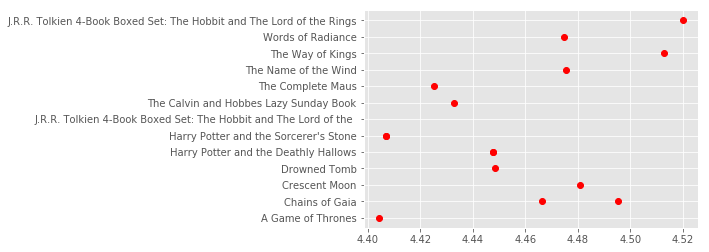

In [17]:
# Plotting the Top 15 Books with their metrics
plt.plot(q_books['Metrics'].head(15), q_books['BookName'].head(15), 'ro')
plt.show()

### Plot of correlation between metrics and ratings

No handles with labels found to put in legend.


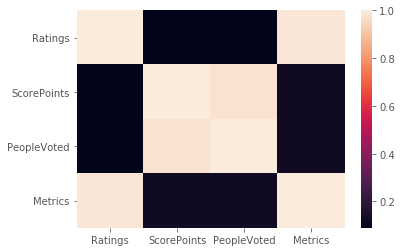

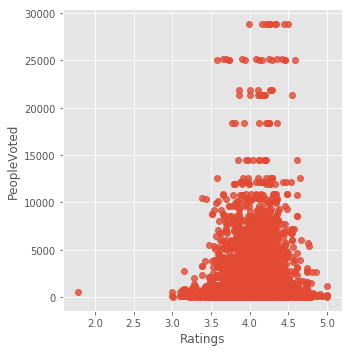

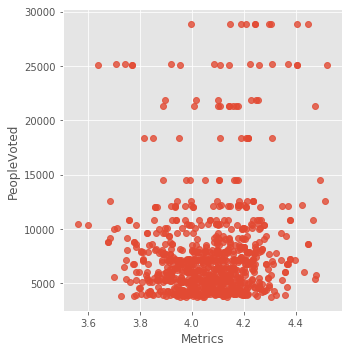

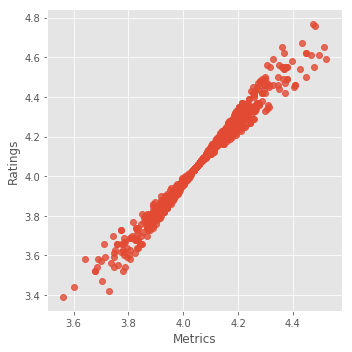

In [18]:
# Corelation between Metrics and ratings
# print(q_books)

# dataLatest= data['Metrics'] 
import seaborn as sns
corr = q_books.corr()
sns.heatmap(corr, 
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='Ratings', y='PeopleVoted', data=data, fit_reg=False,legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
    
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='Metrics', y='PeopleVoted', data=q_books, fit_reg=False,legend=False)


# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='Metrics', y='Ratings', data=q_books, fit_reg=False,legend=False)



### Histogram plot for metrics of each book

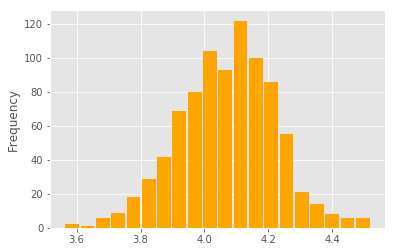

In [19]:
q_books['Metrics'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='orange')

# Content Based Recommendation 

### We built a model to recommend books that are similar to a particular book

* User was asked to enter a book title in lower case (the name is to be entered in the code below)
* Found other books similar to the book title entered based on the description
* Used cosine similarity function to calculate the similarity score between the book title entered and other books in the dataset

Steps undertaken for evaluation:
* Got the result of top 15 books for the book title entered
* From the dataset found a user who has reviewed most number of books from our list of top 15 books
* This implies that when the user has read the entered book title has also read books from the top 15 list recommnded by the model


Demo [link](https://youtu.be/PsfLAjTllXI) to evaluation of our model

Thus, in the future we will use this model to recommend books with similar content the user has previously recommended



['romance' 'fiction' 'young-adult' 'fantasy' 'children' 'science-fiction'
 'covers' 'best' 'nonfiction' 'history' 'mystery' 'historical-fiction'
 'horror' 'paranormal' 'love' 'sci-fi' 'historical-romance' 'gay' 'series'
 'thriller' 'biography' 'middle-grade' 'graphic-novels' 'contemporary'
 'women' 'classics']
children              600
young-adult           600
nonfiction            600
horror                300
middle-grade          300
graphic-novels        300
history               300
gay                   300
romance               300
fiction               300
mystery               300
covers                300
historical-romance    300
biography             300
thriller              300
love                  300
sci-fi                300
contemporary          300
best                  300
series                300
classics              300
historical-fiction    300
paranormal            300
women                 300
science-fiction       300
fantasy               300
Name: Catego

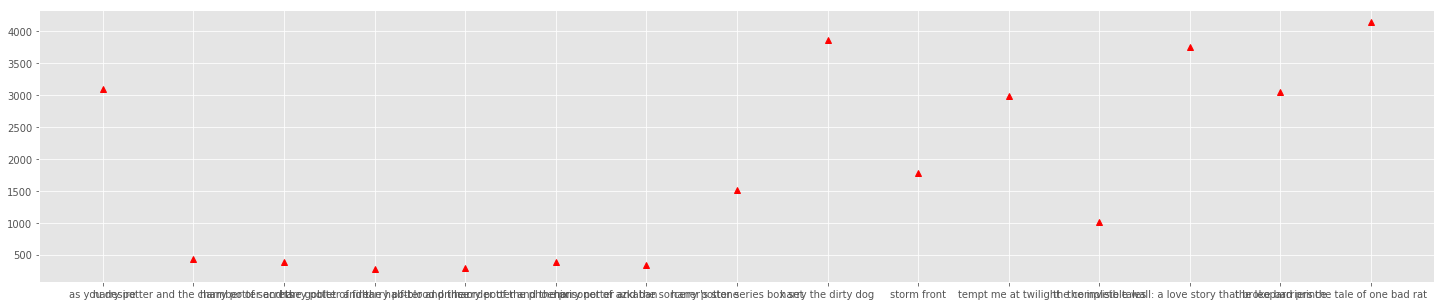

In [20]:
#### Content-Based Filtering

# Importing the dataset
data=pd.read_csv("entireBookList8700.csv",header=0)

#### Data pre-processing

# Changing the name of the category ya to Young adult - handling the duplication of the categories 
data['Category'].replace('ya', 'young-adult',inplace=True)
data['Category'].replace('teen', 'children',inplace=True)
data['Category'].replace('non-fiction','nonfiction',inplace=True)
print(data['Category'].unique())


# Changing the Column name
df = data.rename(columns={'OtherLinks': 'Other Categories'})
# print(df['Other Categories'][0])


# Using the re function to edit the other category column based on our pattern
token = []
for  text in df['Other Categories']:
    # segments the lowercased string into tokens - Based on the requirements
    pattern = r'[A-Z]\w+'
    tokens = nltk.regexp_tokenize(str(text), pattern)
    token.append(tokens)
# print(len(token))


# Overwriting the Other Categories with the modified tokens as per the requirements
df['Other Categories'] = token
# print(df['Other Categories'][0])


# Joining the words in 'Other Categories' from a list to line
df['Other Categories'] = df['Other Categories'].apply(lambda x: ' '.join(x))
# print(df['Other Categories'][0])


# Converting the entire dataframe to lower case
data = df.apply(lambda x: x.astype(str).str.lower())
# print(data['Other Categories'])


#finding the count of the categories
print(data['Category'].value_counts())
# print(len(data))

# Removing the null values
data.dropna(axis='columns')
# print(data.head())
# print(len(data))

# dealing with the duplicate records
data = data.drop_duplicates(subset = 'Book Name')
data.head()
# print(len(data))

data['Training Text'] = data['Description'].astype(str)  + ' ' + data['Other Categories'] + ' ' + data['Author Name'] + ' ' +  data['Book Name']



data['Training Text'] = data['Description'].astype(str) + ' ' + data['Other Categories'] + ' ' + data['Book Name'] + ' ' + data['Author Name'] 
data = data.drop_duplicates(subset = 'Book Name')

# Description of the first 5 Books
data['Description'].head()




#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['Description'] = data['Description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['Training Text'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

#### The matrix output shows the 8700 books and the 36233 words used to describe those books ####


# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# print(cosine_sim)

#Construct a reverse map of indices and Book titles
indices = pd.Series(data.index, index=data['Book Name']).drop_duplicates()
# print(indices)


title = "harry potter and the deathly hallows"
print("Please enter the name of the Book in Lower Case:", title)
# Get the index of the book that matches the title
idx = indices[title]
# print(idx)

# Get the pairwsie similarity scores of all books with that book
sim_scores = list(enumerate(cosine_sim[idx]))
# print(sim_scores)


# Sort the books based on the similarity scores
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
# print(sim_scores[0:10])

# Get the scores of the 10 most similar books
sim_scores = sim_scores[1:16]
# print(sim_scores)

#Get the bookindices
book_indices = [i[0] for i in sim_scores]

# Return the top 10 most similar books
print(data['Book Name'].iloc[book_indices])

# Plotting the Top 15 Book Names with their Indexes

plt.figure(figsize=(25,5))
plt.plot(data['Book Name'].iloc[book_indices],book_indices, '^r')
plt.show()

# Item-Item Collaborative Filtering

Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.


This model attempts to recommend books to user based on the books they have previously rated.


* Initially, we built a matrix with a column and a row for each user’s rating and books (Most of the values in this matrix will be ‘Nan’ which is replaced with 0 as no user has read all the books).
* Used Cosine Similarity function to find the distance between the books
* With this cosine distance we found similar books


Steps undertaken for evaluation:
* For the book in the output list "A walk to remember", the user who has given high ratings for this book has also given high ratings to 4 other books from the output of our model


Demo [link](https://youtu.be/IDB9nIhDLa4) to evaluation of our model

In [ ]:
#### Collaborative Filtering

import pandas as pd
from scipy.spatial.distance import cosine

#Importing the dataset 
data=pd.read_csv("Item-Item.csv",header=0)

#
data = data.iloc[:190, 0:3]

user_reviews_matrix = pd.pivot_table(data, index='User', columns='Book Name', values='Ratings')

user_reviews_matrix = user_reviews_matrix.fillna(0)

print(user_reviews_matrix)

title_similarities = pd.DataFrame(index=user_reviews_matrix.columns, columns=user_reviews_matrix.columns)

print(title_similarities)

num_titles = len(title_similarities.columns)
for i in range(0, num_titles):
    print(i, 'of ', num_titles)
    for j in range(0, num_titles):
        title_similarities.ix[i,j] = 1 - cosine(user_reviews_matrix.ix[:,i], user_reviews_matrix.ix[:,j])

        
recommendations = pd.DataFrame(index=title_similarities.columns, columns=range(1,16))

for i in range(0, len(title_similarities)):
    recommendations.ix[i,:15] = title_similarities.ix[0:,i].sort_values(ascending=False)[:15].index
recommendations.to_csv('book_recommendations.csv')

# Convoluted Neural Network - Deep Learning

Performed multi-label classification using CNN - Keras

Keras is an open source neural network library  in Python.

* Converted each document to a list of word index as a sequence.
* Padded all sequences into the same length.
* Created a CNN model by altering the filter size, total number of words, max words in the document, vector dimension, drop-out rate, number of units in the dense layer and number of output units.


Method of model evaluation:
We compared the performance of our model with and without Pre-trained word of vectors.

We got an accuracy of <font color=red>**86.98%** </font>


In [21]:
# Deep Learning -- CNN Multi label Classification


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import numpy as np

# get a Keras tokenizer

MAX_NB_WORDS=8000
# documents are quite long in the dataset
MAX_DOC_LEN=1000

print(data['Training Text'][0])
print(data['Category'][0])

# Converting the Categories

mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(data['Category'])
# check size of indicator matrix
print(Y.shape)
# check classes
print(mlb.classes_)
# check # of samples in each class
np.sum(Y, axis=0)


tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data['Training Text'])
voc=tokenizer.word_index
voc
# convert each document to a list of word index as a sequence
sequences = tokenizer.texts_to_sequences(data['Training Text'])

print(sequences[0])
# # get the mapping between words to word index

# pad all sequences into the same length (the longest)
padded_sequences = pad_sequences(sequences, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', truncating='post')

C:\Users\murak\Anaconda3a\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


the new abby abernathy is a good girl. she doesn’t drink or swear, and she has the appropriate number of cardigans in her wardrobe. abby believes she has enough distance from the darkness of her past, but when she arrives at college with her best friend, her path to a new beginning is quickly challenged by eastern university's walking one-night stand. travis maddox, lean, cut, and covered in tattoos, is exactly what abby needs—and wants—to avoid. he spends his nights winning money in a floating fight ring, and his days as the ultimate college campus charmer. intrigued by abby’s resistance to his appeal, travis tricks her into his daily life with a simple bet. if he loses, he must remain abstinent for a month. if abby loses, she must live in travis’s apartment for the same amount of time. either way, travis has no idea that he has met his match. romance new adult contemporary young adult romance contemporary romance beautiful disaster jamie mcguire
romance
(4556, 22)
['-' 'a' 'b' 'c' 'd

In [22]:


from keras.utils.vis_utils import plot_model
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
              
def cnn_model(FILTER_SIZES, \
              # filter sizes as a list
              MAX_NB_WORDS, \
              # total number of words
              MAX_DOC_LEN, \
              # max words in a doc
              EMBEDDING_DIM=200, \
              # word vector dimension
              NUM_FILTERS=64, \
              # number of filters for all size
              DROP_OUT=0.5, \
              # dropout rate
              NUM_OUTPUT_UNITS=1, \
              # number of output units
              NUM_DENSE_UNITS=100,\
              # number of units in dense layer
              PRETRAINED_WORD_VECTOR=None,\
              # Whether to use pretrained word vectors
              LAM=0.0):            
              # regularization coefficient
    
    main_input = Input(shape=(MAX_DOC_LEN,), \
                       dtype='int32', name='main_input')
    
    if PRETRAINED_WORD_VECTOR is not None:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        # use pretrained word vectors
                        weights=[PRETRAINED_WORD_VECTOR],\
                        # word vectors can be further tuned
                        # set it to False if use static word vectors
                        trainable=True,\
                        name='embedding')(main_input)
    else:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        name='embedding')(main_input)
    # add convolution-pooling-flat block
    conv_blocks = []
    for f in FILTER_SIZES:
        conv = Conv1D(filters=NUM_FILTERS, kernel_size=f, \
                      activation='relu', name='conv_'+str(f))(embed_1)
        conv = MaxPooling1D(MAX_DOC_LEN-f+1, name='max_'+str(f))(conv)
        conv = Flatten(name='flat_'+str(f))(conv)
        conv_blocks.append(conv)
    
    if len(conv_blocks)>1:
        z=Concatenate(name='concate')(conv_blocks)
    else:
        z=conv_blocks[0]
        
    drop=Dropout(rate=DROP_OUT, name='dropout')(z)

    dense = Dense(NUM_DENSE_UNITS, activation='relu',\
                    kernel_regularizer=l2(LAM),name='dense')(drop)
    preds = Dense(NUM_OUTPUT_UNITS, activation='sigmoid', name='output')(dense)
    model = Model(inputs=main_input, outputs=preds)
    
    model.compile(loss="binary_crossentropy", \
              optimizer="adam", metrics=["accuracy"]) 
    
    return model

In [23]:
from sklearn.model_selection import train_test_split

EMBEDDING_DIM=100
FILTER_SIZES=[2,3,4]
BEST_MODEL_FILEPATH="best_model"
# set the number of output units
# as the number of classes
output_units_num=len(mlb.classes_)
num_filters=64

# set the dense units
dense_units_num= num_filters*len(FILTER_SIZES)


BTACH_SIZE = 64
NUM_EPOCHES = 20

# split dataset into train (80%) and test sets (20%)
X_train, X_test, Y_train, Y_test = train_test_split(\
                padded_sequences, Y, test_size=0.2, random_state=0)

model=cnn_model(FILTER_SIZES, MAX_NB_WORDS, \
                MAX_DOC_LEN, \
                NUM_FILTERS=num_filters,\
                NUM_OUTPUT_UNITS=output_units_num, \
                NUM_DENSE_UNITS=dense_units_num)

earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=2, mode='min')
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, monitor='val_loss', \
                             verbose=2, save_best_only=True, mode='min')
    
training=model.fit(X_train, Y_train, \
          batch_size=BTACH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping, checkpoint],\
          validation_data=[X_test, Y_test], verbose=2)

Train on 3644 samples, validate on 912 samples
Epoch 1/20
 - 73s - loss: 0.5673 - acc: 0.6927 - val_loss: 0.5100 - val_acc: 0.7294

Epoch 00001: val_loss improved from inf to 0.50997, saving model to best_model
Epoch 2/20
 - 71s - loss: 0.4401 - acc: 0.7902 - val_loss: 0.3706 - val_acc: 0.8299

Epoch 00002: val_loss improved from 0.50997 to 0.37056, saving model to best_model
Epoch 3/20
 - 77s - loss: 0.3601 - acc: 0.8394 - val_loss: 0.3308 - val_acc: 0.8476

Epoch 00003: val_loss improved from 0.37056 to 0.33076, saving model to best_model
Epoch 4/20
 - 69s - loss: 0.3188 - acc: 0.8612 - val_loss: 0.3138 - val_acc: 0.8587

Epoch 00004: val_loss improved from 0.33076 to 0.31383, saving model to best_model
Epoch 5/20
 - 70s - loss: 0.2982 - acc: 0.8713 - val_loss: 0.3074 - val_acc: 0.8626

Epoch 00005: val_loss improved from 0.31383 to 0.30739, saving model to best_model
Epoch 6/20
 - 74s - loss: 0.2739 - acc: 0.8848 - val_loss: 0.2986 - val_acc: 0.8648

Epoch 00006: val_loss improved f

       train_acc  train_loss   val_acc  val_loss
epoch                                           
0       0.509967    0.729416  0.567296  0.692670
1       0.370565    0.829944  0.440085  0.790216
2       0.330763    0.847588  0.360051  0.839412
3       0.313834    0.858652  0.318812  0.861229
4       0.307387    0.862590  0.298212  0.871283
5       0.298627    0.864783  0.273947  0.884817
6       0.298348    0.868222  0.243000  0.899386
7       0.299615    0.867125  0.211871  0.916875


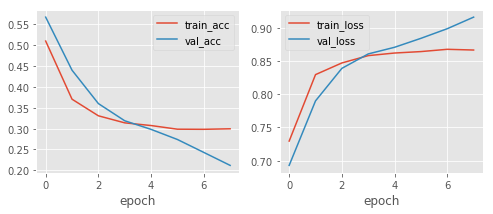

In [24]:
#Investigate the training process

import matplotlib.pyplot as plt
import pandas as pd
# plot a figure with size 20x8

# the fitting history is saved as dictionary
# covert the dictionary to dataframe
df=pd.DataFrame.from_dict(training.history)
df.columns=["train_acc", "train_loss", \
            "val_acc", "val_loss"]
df.index.name='epoch'
print(df)

# plot training history
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3));

df[["train_acc", "val_acc"]].plot(ax=axes[0]);
df[["train_loss", "val_loss"]].plot(ax=axes[1]);
plt.show();

In [25]:
# predict
pred=model.predict(X_test)
# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 86.71%
